In [3]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from scipy import signal

from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [4]:
plot_directory = '/home/flanigan/temp/'

In [5]:
npd = npy.NumpyDirectory('/data/readout/2017-11-30_182459_scans.npd/')

In [6]:
scan = npd.Scan0  # 20 dB attenuation

# Temperatures

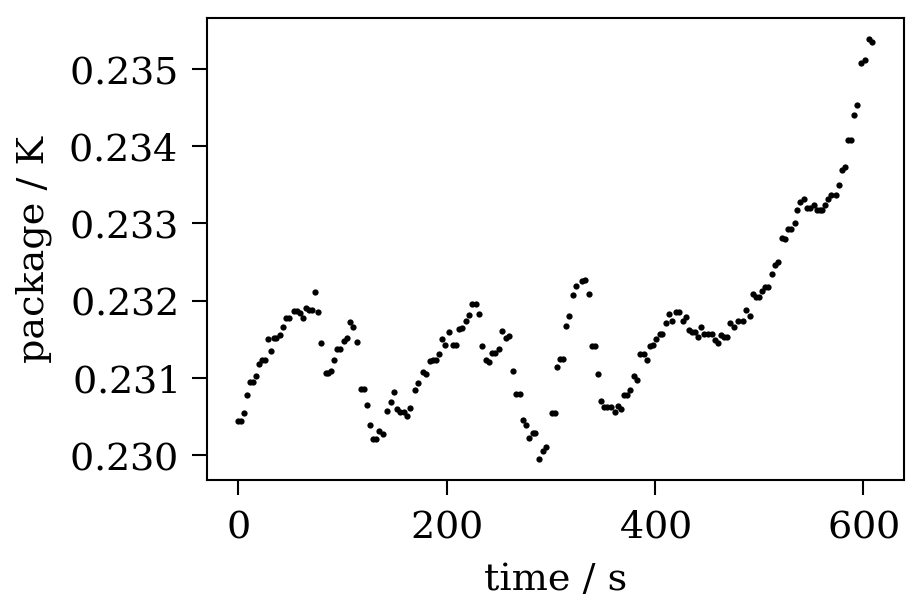

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel('time / s')
ax.set_ylabel('package / K')
for sa in scan.sweep_arrays:
    ax.plot(sa.start_epoch() - scan.start_epoch(),
            sa.state.temperature.package_ruox4550_temperature, '.k')

# Raw data

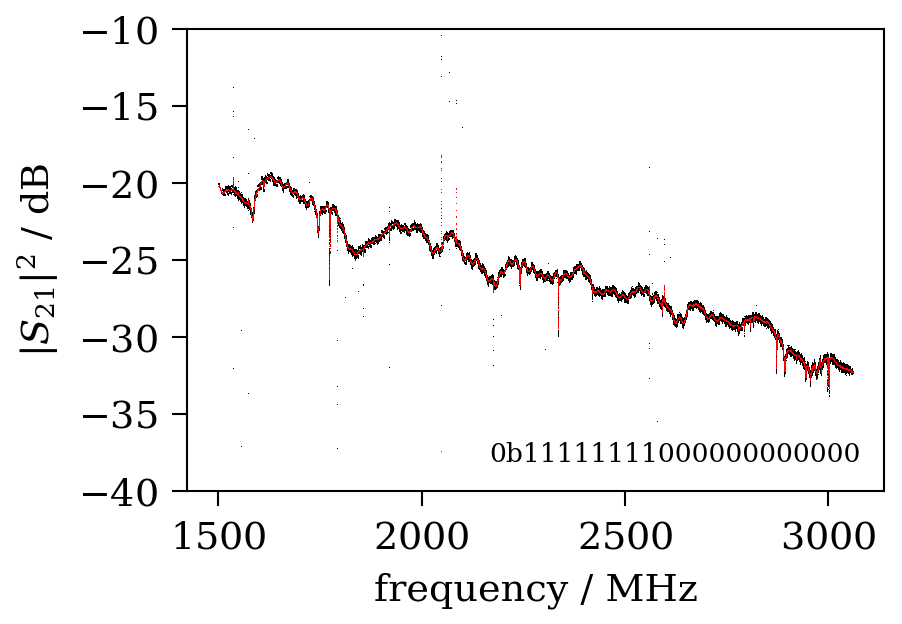

In [7]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz', rotation='horizontal')
ax.set_ylabel('$|S_{21}|^2$ / dB', rotation='vertical')
ax.set_yscale('linear')
ax.set_yscale('linear')
for sa in scan.sweep_arrays:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',k')
frequency, amplitude, smoothed = scan.stitch()
ax.plot(1e-6 * frequency, 20 * np.log10(smoothed), ',r',
        label=bin(scan.sweep_arrays[0].stream_arrays[0].roach_state.fft_shift_register))
ax.legend(fontsize='xx-small')
ax.set_ylim(-40, -10);